In [1]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch.distributions import Uniform
from tqdm import tqdm
from neuralop.models import FNO
from neuralop.models import UNO

In [2]:
data = scipy.io.loadmat('burgers_data_R10.mat')

In [3]:
a, u = data['a'], data['u']

In [4]:
a.shape, u.shape

((2048, 8192), (2048, 8192))

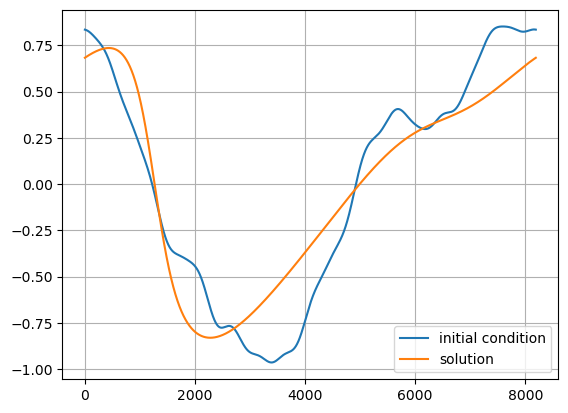

In [5]:
plt.plot(a[0], label='initial condition')
plt.plot(u[0], label='solution')
plt.legend()
plt.grid()
plt.show()

In [6]:
# Add channel dimension
a = a[:, np.newaxis, :]
u = u[:, np.newaxis, :]

In [7]:
# add meshgrid, domain is from (0, 2*pi)
mesh = np.linspace(0, 2*np.pi, a.shape[-1])

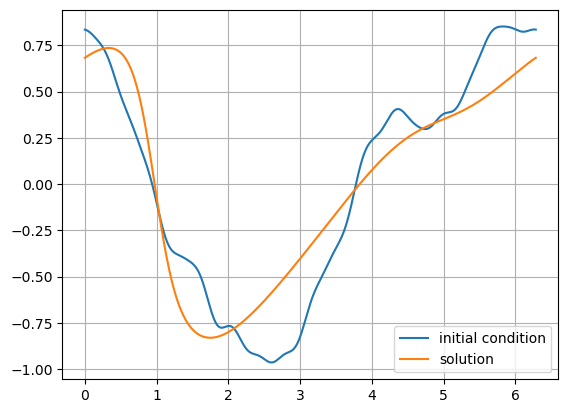

In [8]:
plt.plot(mesh, a[0][0], label='initial condition')
plt.plot(mesh, u[0][0], label='solution')
plt.legend()
plt.grid()
plt.show()

In [9]:
mesh_shape_corrected = mesh[np.newaxis, np.newaxis, :].repeat(a.shape[0], axis=0).repeat(a.shape[1], axis=1)

In [10]:
# concatenate the meshgrid to the input along the channel dimension
a_with_mesh = np.concatenate([a, mesh_shape_corrected], axis=1)
u_with_mesh = np.concatenate([u, mesh_shape_corrected], axis=1)

In [11]:
a_with_mesh.shape

(2048, 2, 8192)

In [12]:
train_x, test_x = a_with_mesh[:1000], a_with_mesh[1000:1200]
train_y, test_y = u_with_mesh[:1000], u_with_mesh[1000:1200]

In [13]:
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1000, 2, 8192), (200, 2, 8192), (1000, 2, 8192), (200, 2, 8192))

In [22]:
# in the below cell, the code was earlier
# model = FNOn_modes=(16,), input_channels=2, output_channels=1, hidden_channels=64()
# this was giving error for really long time because, it's not input_channels but in_channels.
# parameter nameing error, due to auto-completion error in jupyter notebook.

In [14]:
new = FNO(n_modes=(16,), in_channels=2, out_channels=1, hidden_channels=64)

In [15]:
new

FNO(
  (fno_blocks): FNOBlocks(
    (convs): SpectralConv(
      (weight): ModuleList(
        (0-3): 4 x ComplexDenseTensor(shape=torch.Size([64, 64, 9]), rank=None)
      )
    )
    (fno_skips): ModuleList(
      (0-3): 4 x Conv1d(64, 64, kernel_size=(1,), stride=(1,), bias=False)
    )
  )
  (lifting): MLP(
    (fcs): ModuleList(
      (0): Conv1d(2, 256, kernel_size=(1,), stride=(1,))
      (1): Conv1d(256, 64, kernel_size=(1,), stride=(1,))
    )
  )
  (projection): MLP(
    (fcs): ModuleList(
      (0): Conv1d(64, 256, kernel_size=(1,), stride=(1,))
      (1): Conv1d(256, 1, kernel_size=(1,), stride=(1,))
    )
  )
)

In [16]:
output = new(torch.from_numpy(train_x).float()[:10][:, :, :32])

In [17]:
torch.from_numpy(train_x).float()[:10][:, :, :32].shape

torch.Size([10, 2, 32])

In [18]:
output.shape

torch.Size([10, 1, 32])

In [19]:
output = new(torch.from_numpy(train_x).float()[:10][:, :, :64])

In [20]:
torch.from_numpy(train_x).float()[:10][:, :, :64].shape

torch.Size([10, 2, 64])

In [21]:
output.shape

torch.Size([10, 1, 64])